In [1]:
#equilibrium.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 16 March 2018.
#simulate a narrow eccentric ringlet initialized at equilibrium

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape

r.shape =  (1001, 2, 101)


In [4]:
#calculate delta_wt delta_e delta_a versus time
delta_wt = []
delta_e = []
delta_a = []
for tidx in range(len(times)):
    r0 = r[tidx]
    r_inner = r0[0]
    r_outer = r0[1]
    pidx_inner = r_inner.argmin()  
    pidx_outer = r_outer.argmin()    
    wt0 = wt[tidx]
    wt_inner = wt0[0]
    wt_outer = wt0[1]
    dwt = wt_outer[pidx_outer] - wt_inner[pidx_inner]
    if (dwt > np.pi):
        dwt -= 2*np.pi
    if (dwt < -np.pi):
        dwt += 2*np.pi
    delta_wt += [dwt]
    e0 = e[tidx]
    e_inner = e0[0]
    e_outer = e0[1]
    de = e_outer[pidx_outer] - e_inner[pidx_inner]
    delta_e += [de]
    a0 = a[tidx]
    a_inner = a0[0]
    a_outer = a0[1]
    da = a_outer[pidx_outer] - a_inner[pidx_inner]
    delta_a += [da]
delta_wt = np.array(delta_wt)
delta_e = np.array(delta_e)
delta_a = np.array(delta_a)

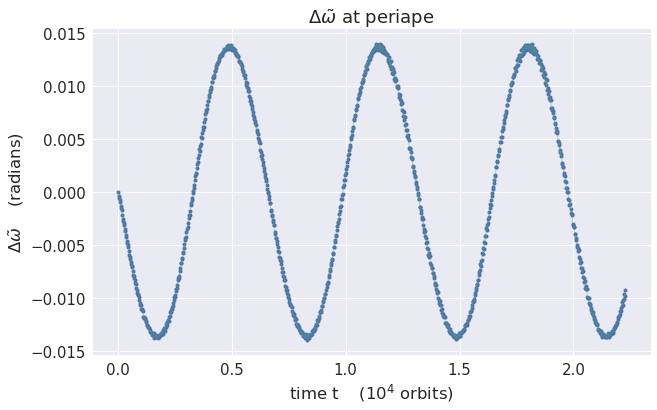

In [5]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e4
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', markersize=4, linestyle='none')
ax.plot(x, y, linestyle='-', alpha=0.4, linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ at periape')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')

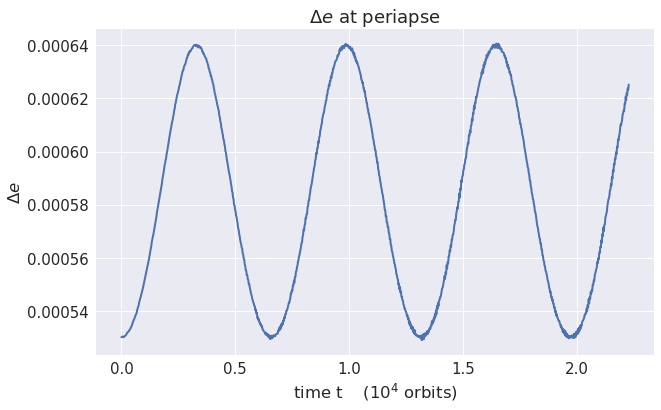

In [6]:
#plot delta_e versus time
x = times/(2*np.pi)/1.0e4
y = delta_e
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta e$ at periapse')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')

In [7]:
#compute H(q**2)
a_init = a[0].mean(axis=1)
e_init = e[0].mean(axis=1)
wt_init = wt[0].mean(axis=1)
a_avg = a_init.mean()
e_avg = e_init.mean()
da = a_init[1] - a_init[0]
de = e_init[1] - e_init[0]
dwt = wt_init[1] - wt_init[0]
q2 = (a_avg*de/da)**2 + (e_avg*a_avg*dwt/da)**2
q = np.sqrt(q2)
q_factor = np.sqrt(1 - q2)
H = (1 - q_factor)/q2/q_factor
print 'q = ', q
print 'q2 = ', q2
print 'a*de/da = ', a_avg*de/da
print 'e*a*dwt/da = ', e_avg*a_avg*dwt/da
print 'H = ', H

q =  0.530511607625
q2 =  0.281442565825
a*de/da =  0.530510168332
e*a*dwt/da =  0.00123576743336
H =  0.638473749309


In [8]:
#equilibrium de
M_central = 1.0
Ra = Rp/a_avg
da_over_a = da/a_avg
de_eq = (21.0/4)*np.pi*e_avg*J2*(M_central/total_ring_mass)*(Ra**2)*(da_over_a**3)/H
print 'equilibrium de_eq = ', de_eq

equilibrium de_eq =  0.000678358313019


In [9]:
#ade/da
adeda = a_avg*de/da
adeda_eq = a_avg*de_eq/da
de_observed = (delta_e.min() + delta_e.max())/2
adeda_recommended = a_avg*de_observed/da
print 'actual a*de/da = ', adeda
print 'equilibrium a*de/da = ', adeda_eq
print 'adeda_recommended = ', adeda_recommended

actual a*de/da =  0.530510168332
equilibrium a*de/da =  0.678697492176
adeda_recommended =  0.58518277745


In [10]:
#libration period
GM = 1.0
a3 = a_avg**3
a_over_da = a_avg/da
n = np.sqrt(GM/a3)
w_lib = (total_ring_mass/M_central)*(a_over_da**2)*n*H/np.pi
T_lib = 2*np.pi/w_lib
print 'libration period (10^5 orbits) = ', T_lib/1.0e5

libration period (10^5 orbits) =  0.618170312284
